# Fake News Classification

**📖Introduction :**

>Fake news classifier is an ML-based approach to classifiying the real and fake news. It's an classification problem so,I tried all classifictaion Algorithm ,and finally on XGBoost algorithm is performed best in Fake news dataset.

Dataset is taken from the [kaggle](https://www.kaggle.com/datasets/hassanamin/textdb3) Fake News DataSet.


**Dependencies :**

* Jupyter Notebook
* Python 3.10.0
* Scikit-Learn
* Tfidf Vectorizer
* nltk 3.7
* Pandas
* Numpy

Install dependencies using [conda](https://docs.conda.io/en/latest/)

**📝TODO :**

*    Pick the dataset from [kaggle](https://www.kaggle.com/datasets/hassanamin/textdb3)
*    Download the dataset from [kaggle](https://www.kaggle.com/datasets/hassanamin/textdb3)
*    **Preprocessing** the data
*    Build a **Model**
*    Save the Model as .pkl


**⚙️Setup --**

In [1]:
import numpy as np
import pandas as pd

 **🗂️Dataset import :**

In [3]:
df = pd.read_csv('fake_or_real_news.csv')  # import fake_news data
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
# don't required Unnamed column: 0 so, drop that column
df = df.drop(columns=['Unnamed: 0'])
df.sample(5)

,title,text,label
451,Get Ready For Civil Unrest: Survey Finds That ...,"in: Protestors & Activists , Special Interests...",FAKE
2735,The Fix Is In: NBC Affiliate Accidentally Post...,Posted 11/03/2016 12:44 am by PatriotRising wi...,FAKE
2895,Report Says Trade Deal Would Boost U.S. Econom...,Report Says Trade Deal Would Boost U.S. Econom...,REAL
1799,Sarah Palin endorses Donald Trump's presidenti...,Former vice-presidential nominee and governor ...,REAL
164,"Buffett: If I Ran Fed, I Would Not Raise Rates...","""I probably wouldn't do much,"" Buffett said wh...",REAL


In [9]:
# lets change the label into a numercial value   # Fake -> 0, Real -> 1
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['label'] = LE.fit_transform(df['label'])
df.head(5)   

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [10]:
# missing and duplicate values check
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [11]:
# duplicate values
df.duplicated().sum()  

29

In [12]:
# drop duplicated values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
df.shape

(6306, 3)

In [14]:
# let's merge title and text in a column
df['ti_text'] = df['title'] + '. ' + df['text']
df.head()

,title,text,label,ti_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear. Daniel Greenfiel...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy. U...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...


**📈Exploratory Data Analysis :-**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df['label'].value_counts()

1    3154
0    3152
Name: label, dtype: int64

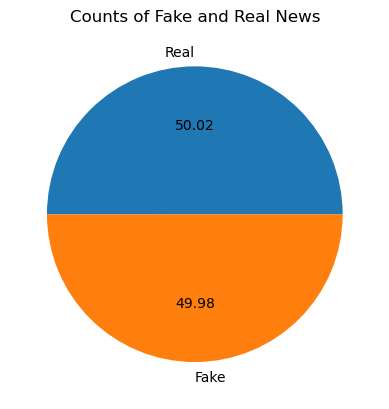

In [17]:
# dataset is balanaced
plt.pie(df['label'].value_counts(),labels=('Real','Fake'),autopct='%0.2f')
plt.title('Counts of Fake and Real News')
plt.show()

In [18]:
# import nltk library
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAFIKUL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Now claclutae number of character present in title+text column
df['num_characters'] = df['ti_text'].apply(len) 
df.head(5)

,title,text,label,ti_text,num_characters
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear. Daniel Greenfiel...,7548
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...,2733
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy. U...,2588
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...,2746
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...,1890


In [20]:
# Now calculate number of words per rows
df['num_words'] = df['ti_text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [21]:
df.head(5)

,title,text,label,ti_text,num_characters,num_words
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear. Daniel Greenfiel...,7548,1481
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...,2733,533
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy. U...,2588,494
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...,2746,517
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...,1890,387


In [22]:
# Now calculate number of sentences per rows
df['num_sentences'] = df['ti_text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head(5)

,title,text,label,ti_text,num_characters,num_words,num_sentences
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear. Daniel Greenfiel...,7548,1481,88
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...,2733,533,25
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy. U...,2588,494,17
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...,2746,517,18
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...,1890,387,22


In [23]:
# all real news
df[df['label']==1][['num_characters','num_words','num_sentences']]

,num_characters,num_words,num_sentences
2,2588,494,17
4,1890,387,22
7,818,153,6
8,13928,2801,80
9,4369,785,33
...,...,...,...
6324,1914,352,16
6327,2276,452,17
6330,4147,739,28
6333,7060,1327,41


In [24]:
# all fake news data
df[df['label']==0][['num_characters','num_words','num_sentences']]

,num_characters,num_words,num_sentences
0,7548,1481,88
1,2733,533,25
3,2746,517,18
5,13346,2712,98
6,3246,658,19
...,...,...,...
6326,3162,582,21
6328,76,17,1
6329,2638,497,14
6331,14384,2611,50


In [25]:
# for real news 
df[df['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3154.000000,3154.000000,3154.000000
mean,5358.128091,1030.654724,40.202283
std,4357.608457,851.402121,34.119791
min,82.000000,15.000000,1.000000
25%,2786.750000,533.250000,21.000000
50%,4742.500000,907.000000,35.000000
75%,6892.500000,1322.000000,51.000000
max,44165.000000,9031.000000,407.000000


In [26]:
# for fake news
df[df['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3152.000000,3152.000000,3152.000000
mean,4190.937817,797.672272,30.264911
std,5688.374019,1105.018160,47.726895
min,15.000000,5.000000,1.000000
25%,1352.750000,257.000000,10.000000
50%,2626.000000,503.000000,19.000000
75%,5092.250000,964.250000,36.000000
max,115449.000000,23982.000000,1343.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

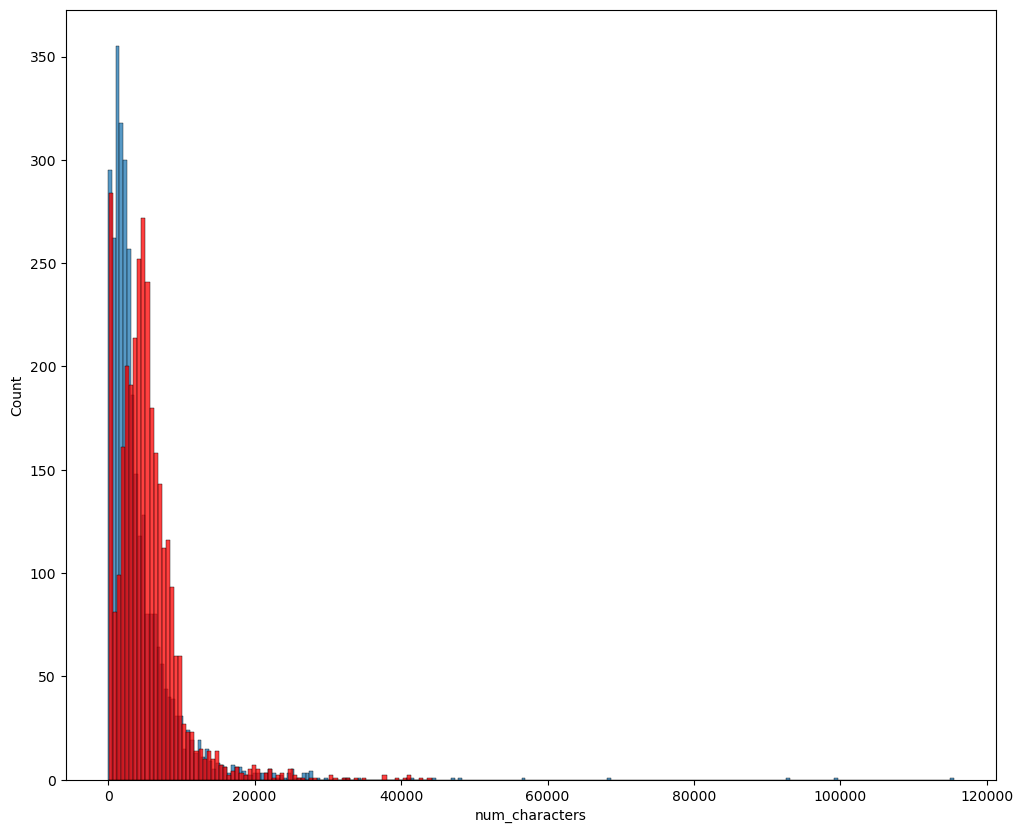

In [27]:
# plotting the num_character for real and fake news
plt.figure(figsize=(12,10))
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

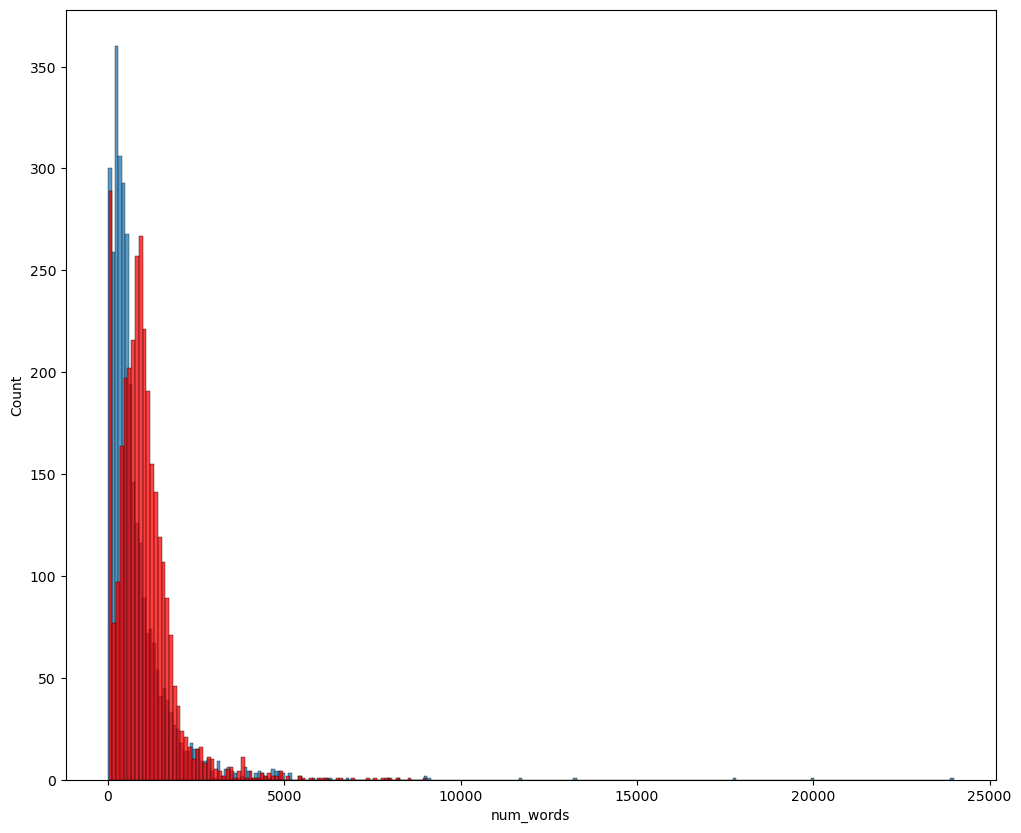

In [28]:
# Real and fake news plot for num_words
plt.figure(figsize=(12,10))
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

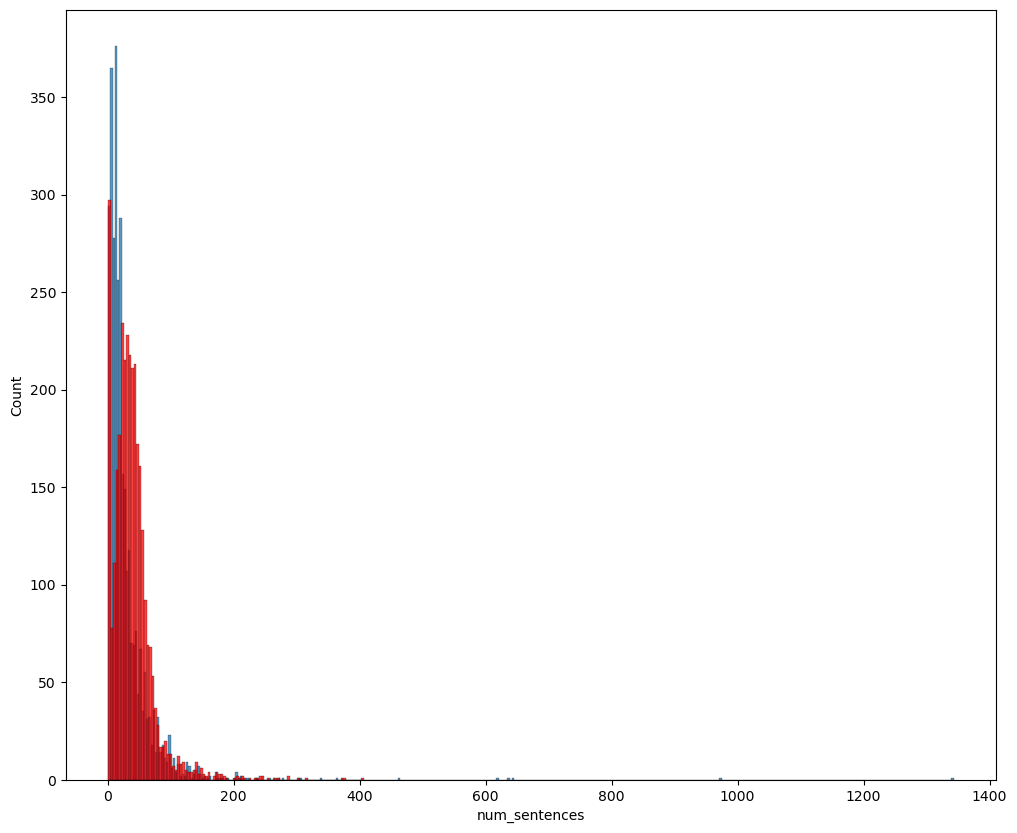

In [29]:
# Real and fake news plot for num_sentences
plt.figure(figsize=(12,10))
sns.histplot(df[df['label']==0]['num_sentences'])
sns.histplot(df[df['label']==1]['num_sentences'],color='red')

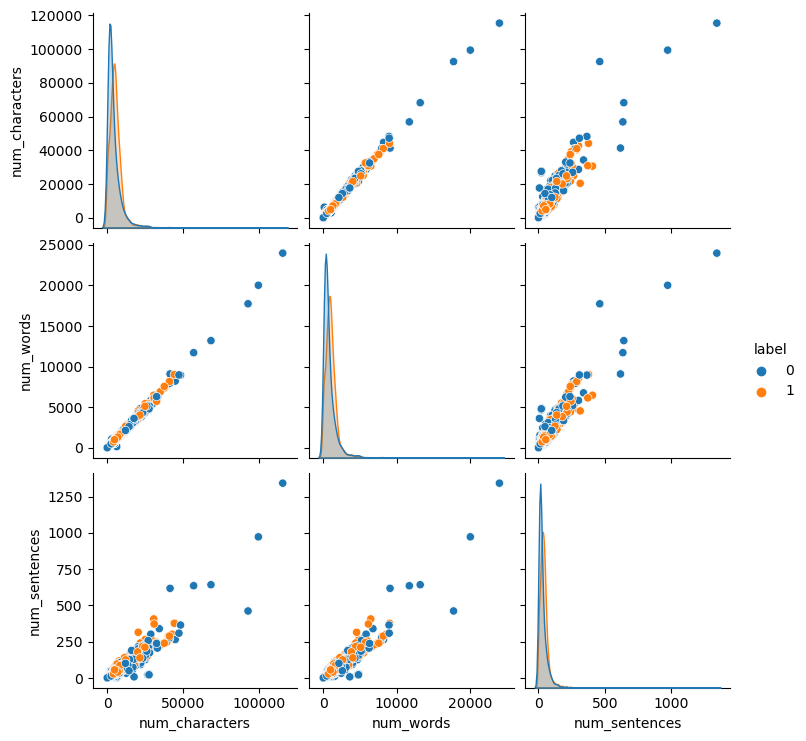

In [30]:
# let's do a pairplot
sns.pairplot(df,hue='label')

In [31]:
# lets check the correlation
df.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.114445,0.117306,0.118945
num_characters,0.114445,1.000000,0.997498,0.931454
num_words,0.117306,0.997498,1.000000,0.945233
num_sentences,0.118945,0.931454,0.945233,1.000000


<AxesSubplot:>

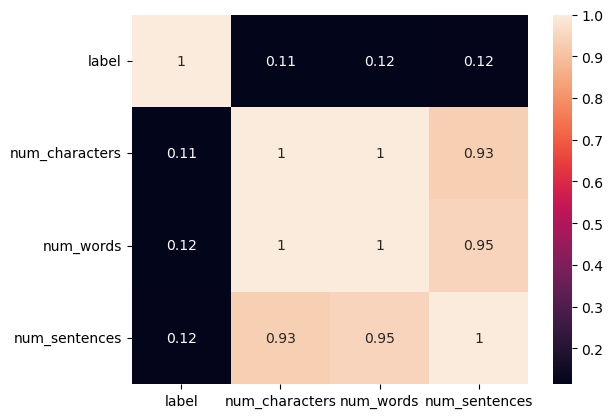

In [32]:
sns.heatmap(df.corr(), annot=True)

In [33]:
# Observation --> From above all the plot we can see that there don't have any correlation of 
# num of character , num of words and number of sentences with labels 

**Data Preprocessing :-**

- Lower case
- Tokenization
- Removing special characters
- Removing stopwords and puctuation
- Stemming

# Tokenization :
>Tokenization is basically splitting the sentences into words known as tokens. This is mainly one of the first steps to do when it comes to text classification.

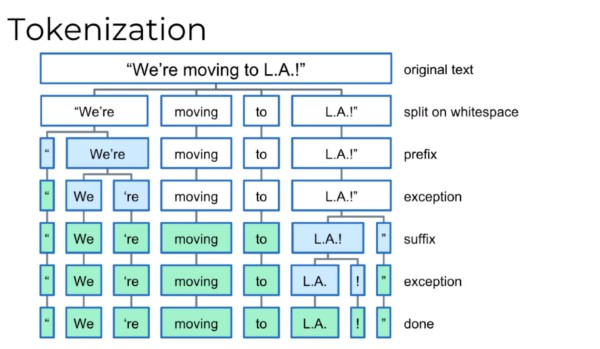




# Stemming :
>Stemming is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization.

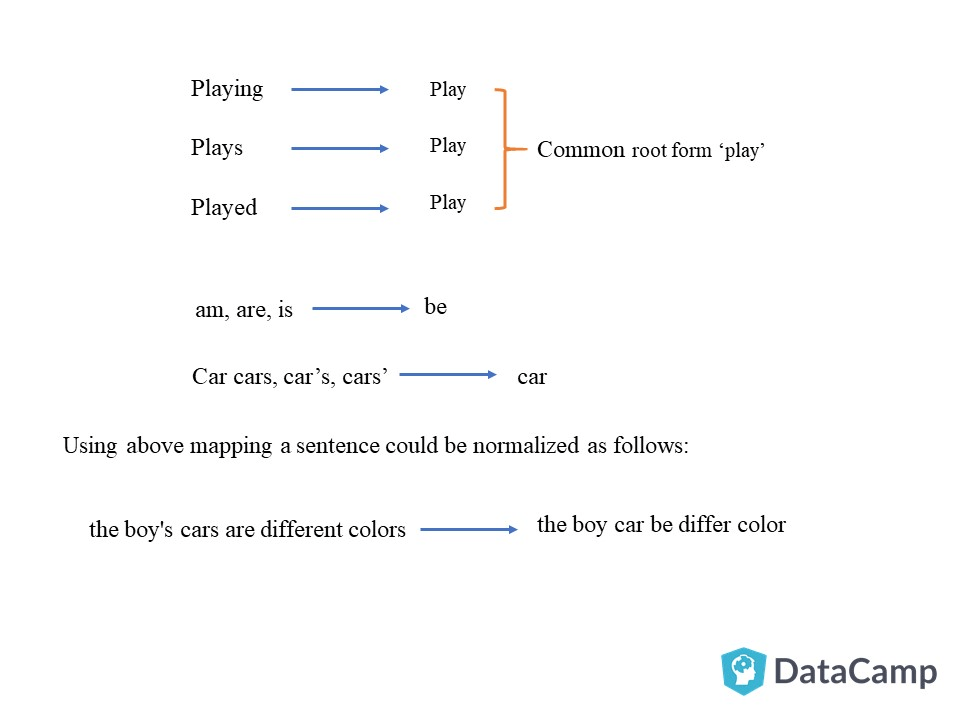

In [34]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
# define a function that will be complete all the above task at once
def text_transformer(text):
    text = text.lower()  # lower case
    text = nltk.word_tokenize(text)  # words seperate
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # stopwrods and punctuation remove
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  # stem all words
        
    return " ".join(y)

In [36]:
text_transformer(df['ti_text'][100])

'ted cruz becam ted cruz 2008 suprem court case call district columbia heller brief file eighth floor price daniel state offic build austin texa specif corner offic man state solicitor gener ted cruz brief took strong stanc divis question whether second amend establish individu right gun protect state local militia brief argu forc first view write individu right keep bear arm fundament right individu right altogeth abrog right thirti attorney gener state sign today white hous push new gun restrict cruz candidaci ride next month iowa caucus surpris texa republican would embrac gun right defin issu hold event fire rang even raffl engrav shotgun campaign promot 2008 situat differ wade case immedi connect texa see signatur ted cruz brief would surpris nine suprem court justic least time cruz solicitor gener five year insert case wide promin import regardless direct tie texa becom part playbook clearli saw heller case watersh gun right write would determin whether second amend modern right 

In [37]:
# Now the function is working properly lets apply this function in all dataset
df['transformed_text'] = df['ti_text'].apply(text_transformer)

In [38]:
df.head(5)

,title,text,label,ti_text,num_characters,num_words,num_sentences,transformed_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear. Daniel Greenfiel...,7548,1481,88,smell hillari fear daniel greenfield shillman ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...,2733,533,25,watch exact moment paul ryan commit polit suic...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy. U...,2588,494,17,kerri go pari gestur sympathi secretari state ...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...,2746,517,18,berni support twitter erupt anger dnc tri warn...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...,1890,387,22,battl new york primari matter primari day new ...


In [39]:
#!pip install wordcloud

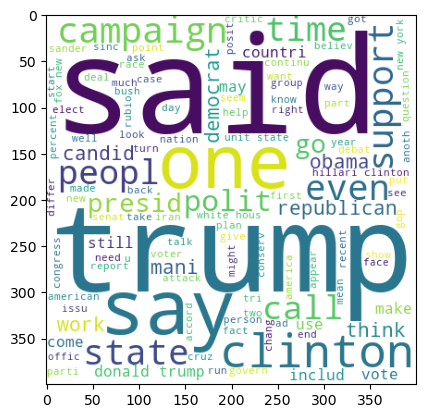

In [40]:
# lets check wich words r most frequent words in this dataset using WordCloud
from wordcloud import WordCloud
wc = WordCloud(width=400, height=400, min_font_size=10, background_color='white')
# real news most frequent words
real_news = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(real_news)

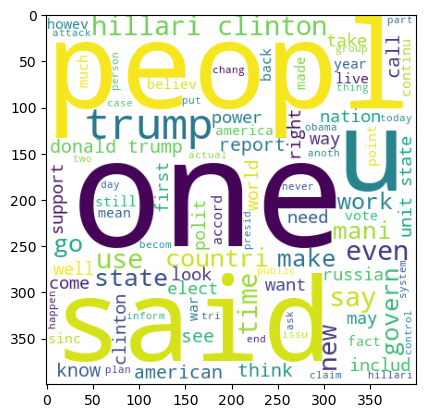

In [41]:
# fake news most frequent words
fake_news = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(fake_news)

# Model Build

In [165]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

# Tfidf Vectorizer
>TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction. For more information click [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [166]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values
print('Shape of features - ',x.shape)
print('Shape of label - ',y.shape)

Shape of features -  (6306, 5000)
Shape of label -  (6306,)


In [167]:
# MinMaxScaler 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [168]:
# split teh data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print('Sahpe of x_train data - ',x_train.shape)
print('Sahpe of x_test data - ',x_test.shape)
print('Sahpe of y_train data - ',y_train.shape)
print('Sahpe of y_test data - ',y_test.shape)

Sahpe of x_train data -  (5044, 5000)
Sahpe of x_test data -  (1262, 5000)
Sahpe of y_train data -  (5044,)
Sahpe of y_test data -  (1262,)


In [67]:
# in case of text problem statement naive bayes algorithm works beteer so, first i will try all
# naive bayes algorithm
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()
cnb = ComplementNB()

In [42]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print('Accuracy score of the GaussianNB algorithm is ',accuracy_score(y_test,y_pred1))
print('Confusion matrix of the GaussianNB algorithm is ',confusion_matrix(y_test,y_pred1))
print('Precision score of the GaussianNB algorithm is ',precision_score(y_test,y_pred1))

Accuracy score of the GaussianNB algorithm is  0.8232963549920761
Confusion matrix of the GaussianNB algorithm is  [[546  58]
 [165 493]]
Precision score of the GaussianNB algorithm is  0.8947368421052632


In [43]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print('Accuracy score of the GaussianNB algorithm is ',accuracy_score(y_test,y_pred2))
print('Confusion matrix of the GaussianNB algorithm is ',confusion_matrix(y_test,y_pred2))
print('Precision score of the GaussianNB algorithm is ',precision_score(y_test,y_pred2))

Accuracy score of the GaussianNB algorithm is  0.8740095087163233
Confusion matrix of the GaussianNB algorithm is  [[463 141]
 [ 18 640]]
Precision score of the GaussianNB algorithm is  0.8194622279129321


In [44]:
gnb.fit(x_train,y_train)
y_pred3 = gnb.predict(x_test)
print('Accuracy score of the GaussianNB algorithm is ',accuracy_score(y_test,y_pred3))
print('Confusion matrix of the GaussianNB algorithm is ',confusion_matrix(y_test,y_pred3))
print('Precision score of the GaussianNB algorithm is ',precision_score(y_test,y_pred3))

Accuracy score of the GaussianNB algorithm is  0.7900158478605388
Confusion matrix of the GaussianNB algorithm is  [[464 140]
 [125 533]]
Precision score of the GaussianNB algorithm is  0.7919762258543833


In [45]:
cnb.fit(x_train,y_train)
y_pred4 = cnb.predict(x_test)
print('Accuracy score of the GaussianNB algorithm is ',accuracy_score(y_test,y_pred4))
print('Confusion matrix of the GaussianNB algorithm is ',confusion_matrix(y_test,y_pred4))
print('Precision score of the GaussianNB algorithm is ',precision_score(y_test,y_pred4))

Accuracy score of the GaussianNB algorithm is  0.873217115689382
Confusion matrix of the GaussianNB algorithm is  [[461 143]
 [ 17 641]]
Precision score of the GaussianNB algorithm is  0.8176020408163265


# Accuracy after useing countvectorizer -

Accuracy score of the GaussianNB algorithm is  0.8232963549920761

Precision score of the GaussianNB algorithm is  0.8947368421052632

Accuracy score of the GaussianNB algorithm is  0.8985736925515055

Precision score of the GaussianNB algorithm is  0.8897058823529411

Accuracy score of the GaussianNB algorithm is  0.7844690966719493

Precision score of the GaussianNB algorithm is  0.7695530726256983

Accuracy score of the GaussianNB algorithm is  0.8985736925515055

Precision score of the GaussianNB algorithm is  0.8897058823529411

# Accuracy after useing Tfidf Vectorize -

Accuracy score of the GaussianNB algorithm is  0.8232963549920761

Precision score of the GaussianNB algorithm is  0.8947368421052632

Accuracy score of the GaussianNB algorithm is  0.8740095087163233

Precision score of the GaussianNB algorithm is  0.8194622279129321

Accuracy score of the GaussianNB algorithm is  0.7900158478605388

Precision score of the GaussianNB algorithm is  0.7919762258543833

Accuracy score of the GaussianNB algorithm is  0.873217115689382

Precision score of the GaussianNB algorithm is  0.8176020408163265

In [46]:
# Observation -> Accuracy of this model is not good let's try more algorithm

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [170]:
lrc = LogisticRegression()
svc = SVC()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgc = XGBClassifier()

In [70]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbc,
    'xgb' : xgc
}

In [71]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [51]:
train_classifier(rfc, x_train,y_train,x_test,y_test)

(0.9072900158478605, 0.9233176838810642)

In [72]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.919175911251981
Precision -  0.9303405572755418
For  SVC
Accuracy -  0.9255150554675119
Precision -  0.937888198757764
For  NB
Accuracy -  0.8827258320126783
Precision -  0.8887195121951219
For  DT
Accuracy -  0.8098256735340729
Precision -  0.8392857142857143
For  KN
Accuracy -  0.8676703645007924
Precision -  0.8286479250334672
For  RF
Accuracy -  0.9112519809825673
Precision -  0.9333333333333333
For  AdaBoost
Accuracy -  0.873217115689382
Precision -  0.8939873417721519
For  BgC
Accuracy -  0.8565768621236133
Precision -  0.8955223880597015
For  ETC
Accuracy -  0.9183835182250396
Precision -  0.9236641221374046
For  GBDT
Accuracy -  0.8969889064976229
Precision -  0.9244372990353698
For  xgb
Accuracy -  0.9255150554675119
Precision -  0.9420062695924765


In [52]:
# accuracy and precision score with max_features
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
10,xgb,0.928685,0.942368
1,SVC,0.867670,0.937611
9,GBDT,0.898574,0.931596
0,LR,0.910460,0.917305
5,RF,0.908875,0.915773
8,ETC,0.908875,0.905830
6,AdaBoost,0.875594,0.902087
7,BgC,0.873217,0.892744
2,NB,0.898574,0.889706
3,DT,0.822504,0.836957


In [63]:
test_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Tfidf_max_ft_400':accuracy_scores,
                        'Precision_Tfidf_max_ft_400':precision_scores}).sort_values('Precision_Tfidf_max_ft_400',ascending=False)
test_df1 = performance_df.merge(test_df1,on='Algorithm')
test_df1

,Algorithm,Accuracy,Precision,Accuracy_Tfidf_max_ft_400,Precision_Tfidf_max_ft_400
0,xgb,0.928685,0.942368,0.931854,0.948276
1,SVC,0.867670,0.937611,0.927100,0.939441
2,GBDT,0.898574,0.931596,0.900158,0.927653
3,LR,0.910460,0.917305,0.918384,0.928903
4,RF,0.908875,0.915773,0.919968,0.938583
5,ETC,0.908875,0.905830,0.926307,0.927383
6,AdaBoost,0.875594,0.902087,0.885103,0.906498
7,BgC,0.873217,0.892744,0.868463,0.895498
8,NB,0.898574,0.889706,0.880349,0.894246
9,DT,0.822504,0.836957,0.795563,0.804878


In [77]:
test_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Tfidf_max_ft_5000':accuracy_scores,
                        'Precision_Tfidf_max_ft_5000':precision_scores}).sort_values('Precision_Tfidf_max_ft_5000',ascending=False)
test_df2 = test_df1.merge(test_df2,on='Algorithm')
test_df2

,Algorithm,Accuracy,Precision,Accuracy_Tfidf_max_ft_5000_x,Precision_Tfidf_max_ft_5000_x,Accuracy_Tfidf_max_ft_5000_y,Precision_Tfidf_max_ft_5000_y,Accuracy_Tfidf_max_ft_5000,Precision_Tfidf_max_ft_5000
0,xgb,0.928685,0.942368,0.925515,0.942006,0.925515,0.942006,0.925515,0.942006
1,SVC,0.867670,0.937611,0.925515,0.937888,0.925515,0.937888,0.925515,0.937888
2,GBDT,0.898574,0.931596,0.896989,0.924437,0.896989,0.924437,0.896989,0.924437
3,LR,0.910460,0.917305,0.919176,0.930341,0.919176,0.930341,0.919176,0.930341
4,RF,0.908875,0.915773,0.911252,0.933333,0.911252,0.933333,0.911252,0.933333
5,ETC,0.908875,0.905830,0.918384,0.923664,0.918384,0.923664,0.918384,0.923664
6,AdaBoost,0.875594,0.902087,0.873217,0.893987,0.873217,0.893987,0.873217,0.893987
7,BgC,0.873217,0.892744,0.856577,0.895522,0.856577,0.895522,0.856577,0.895522
8,NB,0.898574,0.889706,0.882726,0.888720,0.882726,0.888720,0.882726,0.888720
9,DT,0.822504,0.836957,0.809826,0.839286,0.809826,0.839286,0.809826,0.839286


In [ ]:
# Conclusion : After used all algorithm best result provide xgbClassifier which is-->
# Accuracy -  0.9255150554675119
# Precision -  0.9420062695924765

In [171]:
svc.fit(x_train,y_train)
y_preds = svc.predict(x_test)
print(accuracy_score(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))
print(precision_score(y_test,y_preds))

0.9255150554675119
[[564  40]
 [ 54 604]]
0.937888198757764


# **Save Model**
>By using pickle library saved the model in .pkl format so, i can load this .pkl file again in vs code to use it in Web Application  

In [175]:
import pickle 
pickle.dump(svc,open('model_svc.pkl', "wb"))
pickle.dump(tfidf,open('vectorize_new.pkl', 'wb'))